# Customer Churn Analysis – Python Validation Layer

This notebook validates SQL-based churn analysis using statistical techniques and visual exploration.

Project Focus:
- Correlation analysis
- Feature behavior vs churn
- Distribution analysis
- Insight validation

## 1. Data Loading & Overview

We are loading the customer-level KPI dataset generated from SQL.

Each row represents one customer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\DELL\OneDrive\vinisha_achari\Olist_churn_analysis\customer_kpi.csv")

df.head()

,customer_unique_id,customer_state,total_orders,total_spent,avg_order_value,last_purchase_date,recency_days,avg_delivery_delay,avg_freight_ratio,churn_flag
0,5c64fc047d4115cc4be24c9c0c9503c2,DF,1,88.58,88.58,2018-07-03 18:18:34,106,-16.0,0.265609,1
1,9dfe23c51c1758f1904a3fef4421b168,SP,1,57.55,57.55,2017-11-29 21:40:21,322,-14.0,0.156319,1
2,409717419af694c5f26f50b9b50714f2,SP,1,97.39,97.39,2018-03-24 15:13:30,207,-9.0,0.083315,1
3,34dd888b565982c76c7a9ee9dc41db4e,GO,1,130.88,130.88,2017-10-13 19:57:48,369,0.0,0.379136,1
4,520a88dae0fd97b3230c7d36aea4196b,RJ,1,413.31,413.31,2017-03-13 23:23:23,583,-15.0,0.033533,1


In [3]:
# performing EDA
df.info()
df['churn_flag'].value_counts(normalize=True) * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96136 entries, 0 to 96135
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  96136 non-null  object 
 1   customer_state      96136 non-null  object 
 2   total_orders        96136 non-null  int64  
 3   total_spent         96136 non-null  float64
 4   avg_order_value     96136 non-null  float64
 5   last_purchase_date  96136 non-null  object 
 6   recency_days        96136 non-null  int64  
 7   avg_delivery_delay  96136 non-null  float64
 8   avg_freight_ratio   96136 non-null  float64
 9   churn_flag          96136 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 7.3+ MB


churn_flag
1    96.918948
0     3.081052
Name: proportion, dtype: float64

### Observations:
- Dataset contains ~96k customers
- Churn rate is highly imbalanced (~97% churned)
- Numeric variables show skewness

In [4]:
df.describe()

,total_orders,total_spent,avg_order_value,recency_days,avg_delivery_delay,avg_freight_ratio,churn_flag
count,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000
mean,1.034378,166.523177,161.395364,288.151525,-11.511244,0.305515,0.969189
std,0.213142,231.360957,222.290483,153.431096,10.188042,0.310527,0.172805
min,1.000000,0.000000,0.000000,0.000000,-147.000000,0.000000,0.000000
25%,1.000000,63.117500,62.440000,164.000000,-17.000000,0.130508,1.000000
50%,1.000000,108.000000,105.812500,269.000000,-12.000000,0.223646,1.000000
75%,1.000000,183.400000,177.210000,397.000000,-7.000000,0.378446,1.000000
max,17.000000,13664.080000,13664.080000,773.000000,188.000000,21.447059,1.000000


## 2. Correlation Analysis

This section measures linear relationships between numerical features and churn_flag.

**Purpose:**
To statistically validate behavioral insights derived from SQL analysis.

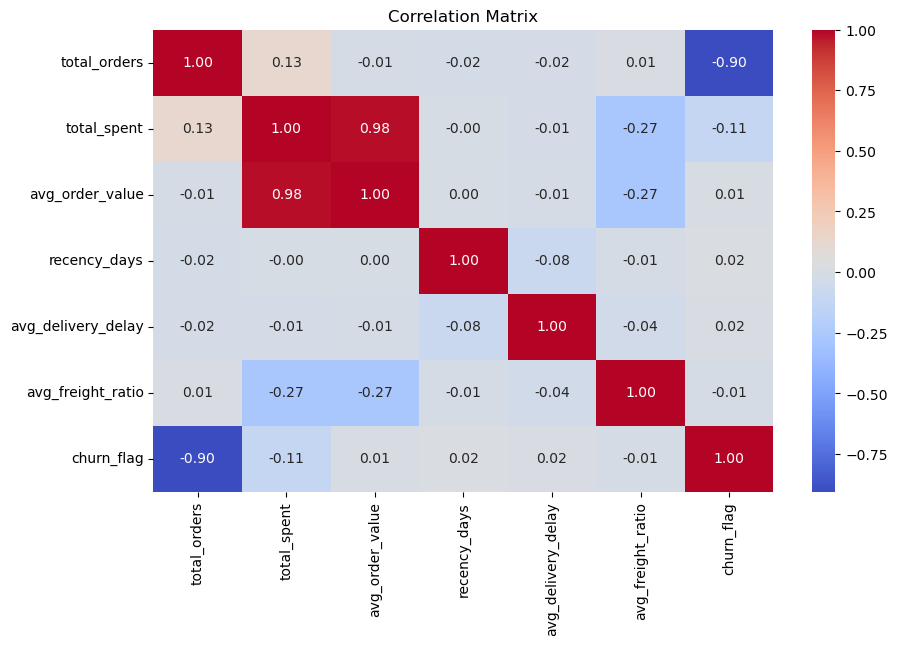

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap="coolwarm",
            fmt=".2f")

plt.title("Correlation Matrix")
plt.show()

### Key Insights:

- total_orders shows strong negative correlation with churn_flag.
- total_spent also negatively correlates with churn.
- recency_days positively correlates with churn.

This confirms that low-frequency, low-value, and inactive customers are more likely to churn.

## 3. Feature Behavior vs Churn

We compare feature distributions between churned and non-churned customers.

### Total Orders vs Churn

Customers with only one purchase dominate the churned group.
Higher order frequency significantly reduces churn likelihood.

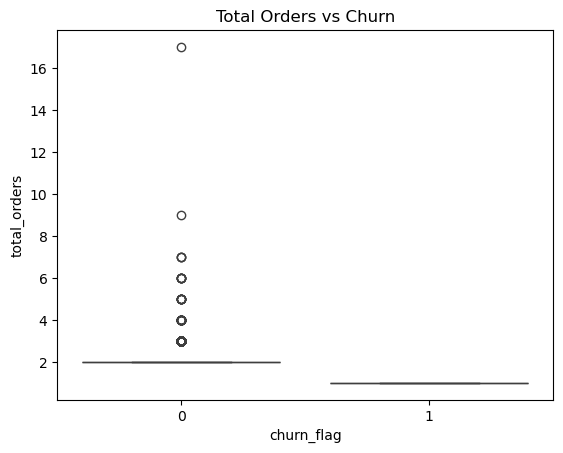

In [7]:
sns.boxplot(x="churn_flag", y="total_orders", data=df)
plt.title("Total Orders vs Churn")
plt.show()

### Recency Days vs Churn
Customers who have churned typically show a higher median recency compared to active customers. 

Longer periods of inactivity are key indicator of churn.

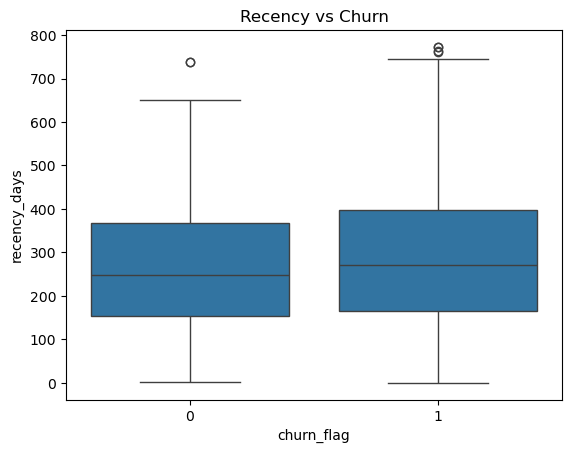

In [8]:
sns.boxplot(x="churn_flag", y="recency_days", data=df)
plt.title("Recency vs Churn")
plt.show()

### Total spent vs Churn
Customers with lower-spent are churning more. It alligns with Repeatancy of Purchasing behaviour.

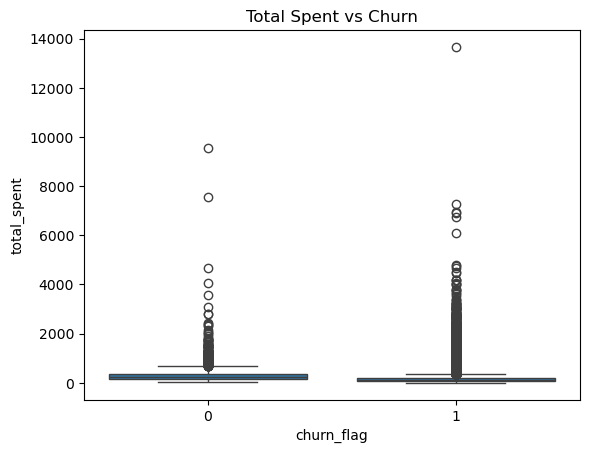

In [9]:
sns.boxplot(x="churn_flag", y="total_spent", data=df)
plt.title("Total Spent vs Churn")
plt.show()

## 4. Distribution Characteristics

The dataset shows high skewness and outliers, which is typical in ecommerce environments:

- Majority of customers place only one order.
- A small percentage of customers generate disproportionately high revenue.
- Long-tail spending behavior is observed.

Outliers reflect real business dynamics rather than data errors.

In [10]:
# Showing Correlation numerically.
corr_with_churn = df.corr(numeric_only=True)['churn_flag'].sort_values(ascending=False)
print(corr_with_churn)

churn_flag            1.000000
recency_days          0.022238
avg_delivery_delay    0.017351
avg_order_value       0.010279
avg_freight_ratio    -0.009774
total_spent          -0.114432
total_orders         -0.904634
Name: churn_flag, dtype: float64


## 5. Conclusion

Python-based statistical validation confirms SQL findings:

- The dataset exhibits severe class imbalance (~97% churned customers).
- Customer frequency is the strongest churn indicator.
- Low-spending and inactive customers show higher churn probability.
- Revenue concentration follows a Pareto-like distribution.

This analysis provides a strong foundation for retention strategy development.